# **Tratamento de Dados das Ações**

- Diogo Nunes Batista
- Rafael de Oliveira Évora
- Vinicius Gabriel 

### Carregamento dos dados

In [18]:
import pandas
import numpy as np

df_stocks_types = {
    'ABERTURA': np.float64,
    'FECHAMENTO': np.float64,
    'VARIAÇÃO': np.float64,
    'MÍNIMO': np.float64,
    'MÁXIMO': np.float64,
    'VOLUME': str
}

df_selic_types = {
    'valor': np.float64,
}

STOCK_NAME = 'EMBR3'

df_stocks = pandas.read_csv(f'data/raw/{STOCK_NAME}.csv', index_col="DATA" , dtype=df_stocks_types, decimal=',')

df_selic = pandas.read_csv('data/raw/selic.csv', sep=';', index_col="data",  dtype=df_selic_types , decimal=',')

df_stocks, df_selic

(            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO   VOLUME
 DATA                                                               
 14/11/2024     54.42       55.42     -2.24   54.95   57.10  888,42M
 13/11/2024     55.67       56.69      4.73   54.42   57.28  973,17M
 12/11/2024     54.34       54.13     -2.73   53.26   56.00  910,50M
 11/11/2024     54.34       55.65      3.46   53.92   56.01  495,51M
 08/11/2024     50.05       53.79      7.47   49.40   55.28  999,99M
 ...              ...         ...       ...     ...     ...      ...
 23/11/2022     14.20       14.18     -0.77   14.09   14.43   92,72M
 22/11/2022     14.40       14.29     -0.49   14.04   14.50   79,35M
 21/11/2022     14.34       14.36      1.13   14.08   14.50   83,83M
 18/11/2022     13.92       14.20      2.23   13.86   14.63  142,60M
 17/11/2022     14.02       13.89     -3.41   13.32   14.22  230,56M
 
 [501 rows x 6 columns],
                valor
 data                
 03/01/2022  0.034749
 04/01/202

### Tratamento dos dados

In [19]:
df_selic.rename(columns={'valor': 'SELIC'}, inplace=True)
df_selic['SELIC'] = df_selic['SELIC']

df_stocks['VOLUME'] = df_stocks['VOLUME'].str.replace('M', '').str.replace(',', '.').astype(np.float64) # Remove 'M' e subtitui ',' por '.' o que possibilita a conversão para float

df = df_stocks.join(df_selic, how='inner') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

df = df.iloc[::-1]

df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
17/11/2022,14.02,13.89,-3.41,13.32,14.22,230.56,0.050788
18/11/2022,13.92,14.20,2.23,13.86,14.63,142.60,0.050788
21/11/2022,14.34,14.36,1.13,14.08,14.50,83.83,0.050788
22/11/2022,14.40,14.29,-0.49,14.04,14.50,79.35,0.050788
23/11/2022,14.20,14.18,-0.77,14.09,14.43,92.72,0.050788
...,...,...,...,...,...,...,...
08/11/2024,50.05,53.79,7.47,49.40,55.28,999.99,0.041957
11/11/2024,54.34,55.65,3.46,53.92,56.01,495.51,0.041957
12/11/2024,54.34,54.13,-2.73,53.26,56.00,910.50,0.041957
13/11/2024,55.67,56.69,4.73,54.42,57.28,973.17,0.041957


### Plotando

C:\Users\Diogo\AppData\Local\Temp\ipykernel_12500\2736737018.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


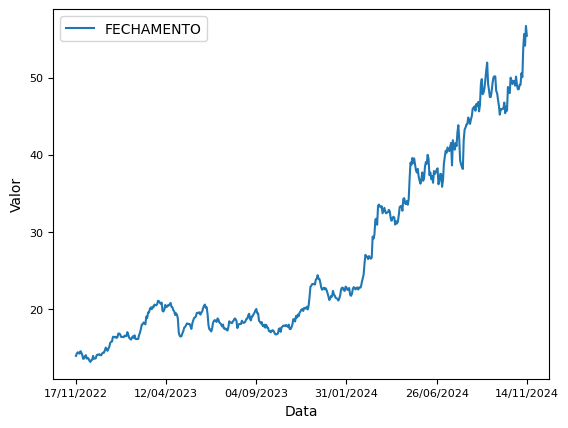

In [20]:
ax = df.plot(y='FECHAMENTO', xlabel='Data', ylabel='Valor', fontsize=8)
ax.get_figure().show()

### Normalização

In [21]:
df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']] = df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']].div(100.0)
df['VOLUME'] = df['VOLUME'].div(1000.0)
df['VARIAÇÃO'] = df['VARIAÇÃO'].add(100.0).div(1000.0)

df.to_csv(f'data/final/{STOCK_NAME}.csv', index_label='DATA', sep=';', decimal='.')